# Introduction into Exploratory Data Analysis (EDA)

## Exploring Daily Statistics for Trending YouTube Videos

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/e/e1/Logo_of_YouTube_%282015-2017%29.svg", width = 800)

**WHY EDA?**  
Statistical analysis in order to solve tasks and confirm/reject hypotheses is a part of the Data Analyst Life Cycle.  
Initial investigations on your data are key in order to understand them - which again is necessary for further data analysis and future predictions.  
Within an EDA, you will perform initial investigations and aim for:  
- discover patterns 
- spot anomalies 
- test hypotheses 
- check assumptions 

**OBJECTIVE OF THIS NOTEBOOK**  
This notebook contains an example EDA on daily statistics for trending YouTube videos.
We will go through the cleaning and feature engineering part of an EDA as well as the hypotheses making and testing part.
After going through this code-along you will have an idea about
- how to approach an EDA
- the single parts of an EDA
- what lines of code are commonly used within an EDA
- how to build and answer hypotheses

**CONTENT OF THIS NOTEBOOK**  
In this notebook we will have a look at daily statistics for trending YouTube videos.  

The data as well as the data-descriptions are retrieved from [Kaggle](https://www.kaggle.com/datasnaek/youtube-new). The data was collected from Google's You Tube API using an open-source tool available on [Github](https://github.com/mitchelljy/Trending-YouTube-Scraper)
There you can find the following description of this data:  
"YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangnam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for."  

*What does trending mean?*  
According to [YouTube](https://support.google.com/youtube/answer/7239739?hl=en), trending helps viewers see what’s happening on YouTube and in the world. Trending aims to surface videos that a wide range of viewers would find interesting. Some trends are predictable, like a new song from a popular artist or a new movie trailer. Others are surprising, like a viral video. Trending isn’t personalized and displays the same list of trending videos in each country to all users.  
The list of trending videos is updated roughly every 15 minutes. With each update, videos may move up, down, or stay in the same position in the list.

Data are available for different countries as separate files, in this notebook we will use the daily statistics for Germany for the years 2017/2018.


**BUSINESS CASE**  
You work as Data Analyst for a music agency, which has a lot of prospective music stars under contract.  
The agency instructed you to give them an overview about how likely it is, that videos of their stars become trending videos on YouTube.  
They want to know, what number of views, likes, dislikes the most popular trending videos had in the past.    
Do music videos become trending videos at all? Which channels might be a good choice? When is a good time to publish a video?  

Questions about questions - and you should answer them.

## Let's get started

Set-up your working environment

In [57]:
# import the necessary libraries you need for your analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud , STOPWORDS
import emoji
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import iplot

In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
com = pd.read_csv('UScomments.csv', on_bad_lines = 'skip')

C:\Users\palab\AppData\Local\Temp\ipykernel_9184\542218769.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  com = pd.read_csv('UScomments.csv', on_bad_lines = 'skip')


## Understand your Data

As first part of an EDA it is important to find out what information is contained in the data set.  
We start by reading in our data and get some basic information for our dataset.  

In [17]:
com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [18]:
com.dropna(inplace=True)

In [19]:
com.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [20]:
com.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [21]:
TextBlob("Not a bad boy").sentiment.polarity

0.3499999999999999

In [22]:
polarity = []

for n in com['comment_text']:
    try:
        polarity.append(TextBlob(n).sentiment.polarity)
    except:
        polarity.append(0)

In [23]:
com['polarity'] = polarity
com.head(8)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.0


In [24]:
positive_com = com[com.polarity == 1]
positive_com.head(6)

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0
325,sjlHnJvXdQs,This is awesome. 1:20 XDDDDDDDDD,0,0,1.0


In [25]:
negative_com = com[com.polarity == -1]
negative_com.head(6)

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0
1932,-Ifnaxi2LQg,this is the worst thing i've heard. ever.,0,0,-1.0


In [26]:
neutral_com = com[com.polarity == 0]
neutral_com.head(6)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.0


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

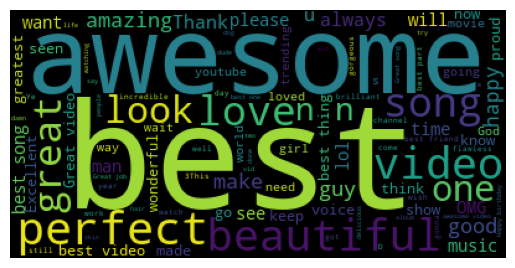

In [27]:
total_p_com = ''.join(positive_com.comment_text)
p_wc = WordCloud(stopwords=set(STOPWORDS)).generate(total_p_com)
plt.imshow(p_wc)
plt.axis('off')


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

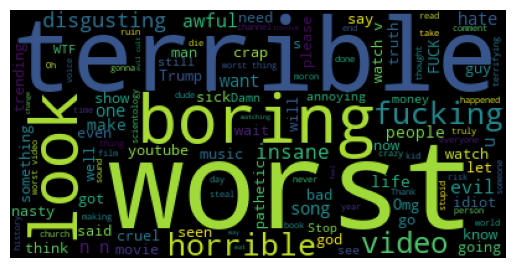

In [28]:
total_n_com = ''.join(negative_com.comment_text)
n_wc = WordCloud(stopwords=set(STOPWORDS)).generate(total_n_com)
plt.imshow(n_wc)
plt.axis('off')

(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

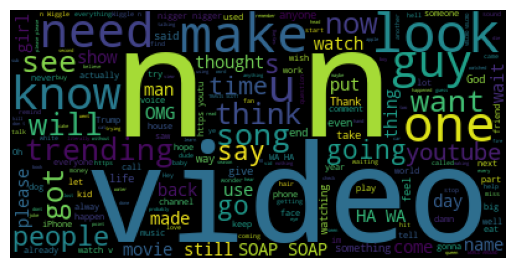

In [29]:
total_nt_com = ''.join(neutral_com.comment_text)
nt_wc = WordCloud(stopwords=set(STOPWORDS)).generate(total_nt_com)
plt.imshow(nt_wc)
plt.axis('off')

### Analysis of emojis


emoji_list = [n for n in com.comment_text if n in emoji.EMOJI_DATA]

In [36]:
emoji_list = []
for n in com.comment_text:
    if n in emoji.EMOJI_DATA:
        emoji_list.append(n)

In [38]:
emoji_list[:4]

['👍', '❤️', '😂', '❤️']

In [43]:
Counter(emoji_list).most_common(12)

[('❤️', 164),
 ('❤', 148),
 ('👍', 120),
 ('😍', 120),
 ('😂', 90),
 ('♥', 43),
 ('💖', 38),
 ('💜', 28),
 ('🔥', 28),
 ('🐍', 23),
 ('👌', 22),
 ('💕', 21)]

In [52]:
frequency = [Counter(emoji_list).most_common(12)[i][1] for i in range(12)]
emojis = [Counter(emoji_list).most_common(12)[i][0] for i in range(12)]

In [54]:
trace = go.Bar(x = emojis , y = frequency)

In [58]:
iplot([trace])